In [1]:
import sys, os
import numpy as np
from tqdm import tqdm
import csv
sys.path[0] = '../'
from models.random_baseline import RandomBaselineModel
from project_utils.generate_distributions import create_distributions
import pandas as pd
import torch 

In [2]:
data_path = '../data/new_dataset/'
train_dataset = data_path + 'train.csv'

In [3]:
train_pd = pd.read_csv(train_dataset)

In [4]:
train_pd['midi_notes']

0       [[76.0, 0.25, 0.0], [76.0, 0.75, 0.5], [76.0, ...
1       [[79.0, 1.0, 0.0], [77.0, 2.0, 0.0], [77.0, 1....
2       [[67.0, 1.0, 0.0], [72.0, 1.0, 0.0], [74.0, 1....
3       [[71.0, 0.5, 0.0], [71.0, 1.0, 0.5], [71.0, 0....
4       [[63.0, 0.5, 0.0], [64.0, 1.0, 0.0], [63.0, 1....
                              ...                        
5718    [[77.0, 1.0, 0.0], [70.0, 1.0, 0.0], [73.0, 1....
5719    [[79.0, 1.0, 0.0], [81.0, 1.0, 0.0], [88.0, 1....
5720    [[72.0, 1.0, 0.0], [75.0, 2.0, 0.0], [75.0, 1....
5721    [[57.0, 0.5, 0.0], [57.0, 1.0, 0.5], [57.0, 1....
5722    [[67.0, 0.75, 0.5], [67.0, 0.5, 0.0], [66.0, 0...
Name: midi_notes, Length: 5723, dtype: object

In [5]:
from collections import Counter
import ast


In [6]:
unique_durations = Counter()
unique_gaps = Counter()
for row in train_pd['midi_notes']:
    # Evaluate the string representation of the list
    list_of_notes = ast.literal_eval(row)

    for note_info in list_of_notes:
        # note_info format is assumed to be [midi_note, duration, gap]
        duration = note_info[1]  # Access the duration
        gap = note_info[2]
        unique_durations[duration] += 1
        unique_gaps[gap]+=1


In [7]:
unique_durations.keys()
uniquedurs = list(unique_durations.keys())
unique_gaps.keys()
uniquegs = list(unique_gaps.keys())


In [8]:
train_midi_dist, train_duration_dist, train_gap_dist = create_distributions(train_dataset)

In [9]:
import matplotlib.pyplot as plt


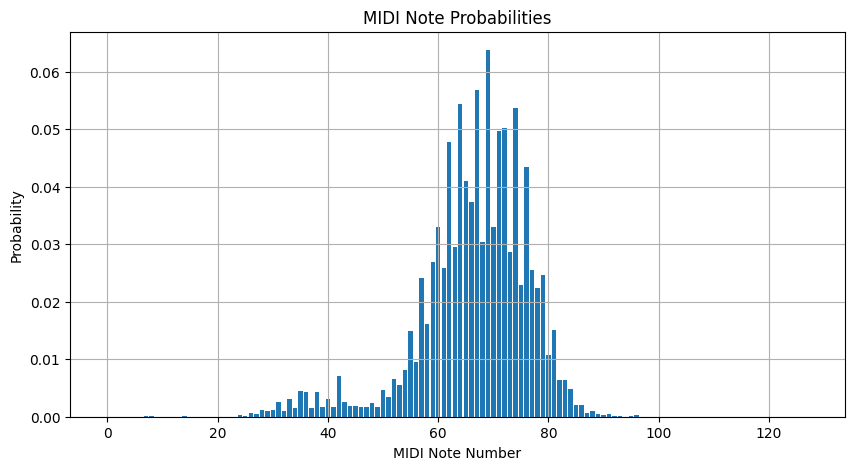

In [10]:
probabilities = train_midi_dist
midi_notes = list(range(len(probabilities)))

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(midi_notes, probabilities)

# Add title and labels
plt.title('MIDI Note Probabilities')
plt.xlabel('MIDI Note Number')
plt.ylabel('Probability')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

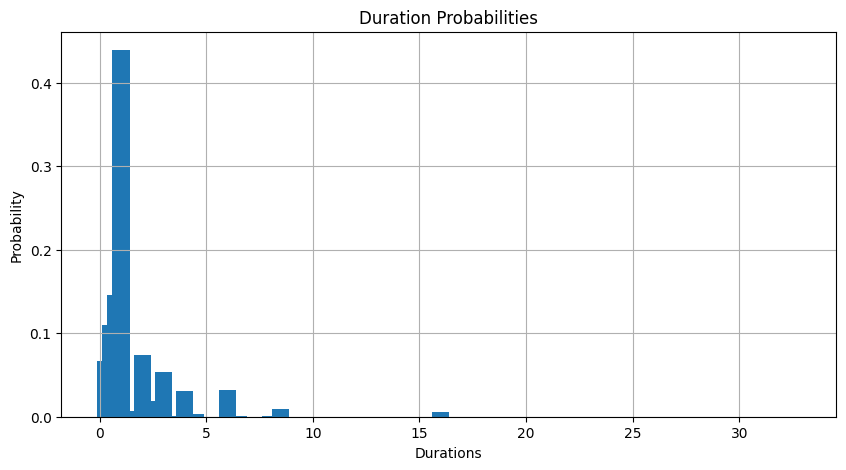

In [11]:
probabilities_dur = train_duration_dist

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(uniquedurs, probabilities_dur)

# Add title and labels
plt.title('Duration Probabilities')
plt.xlabel('Durations')
plt.ylabel('Probability')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

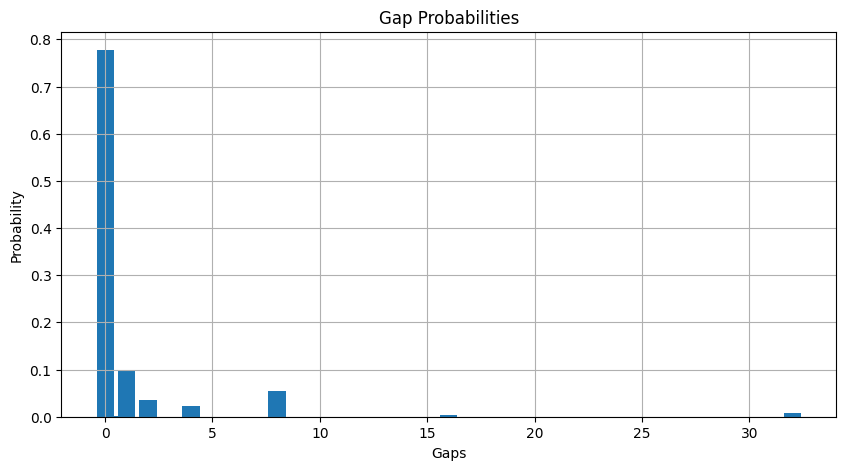

In [12]:
probabilities_gap = train_gap_dist

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(uniquegs, probabilities_gap)

# Add title and labels
plt.title('Gap Probabilities')
plt.xlabel('Gaps')
plt.ylabel('Probability')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [13]:
train_midi_dist

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.692732315480518e-05,
 4.079897447697755e-05,
 5.385464630961036e-05,
 5.711856426776857e-06,
 3.590309753974024e-05,
 0.0,
 4.895876937237305e-06,
 0.0,
 0.0001811474466777803,
 5.711856426776857e-06,
 2.692732315480518e-05,
 7.343815405855959e-06,
 8.159794895395509e-07,
 2.2031446217567876e-05,
 0.0,
 1.3055671832632815e-05,
 2.1215466728028326e-05,
 2.0399487238488775e-05,
 0.00028804075980746145,
 7.588609252717823e-05,
 0.0007319336021169772,
 0.00045694851414214855,
 0.001082804782618984,
 0.0009220568231796926,
 0.0011480831417821481,
 0.002550751884300636,
 0.0009326645565437067,
 0.003010964316400943,
 0.0015577048455310027,
 0.004499310905321084,
 0.004310003663747908,
 0.00159931979949752,
 0.004279812422634944,
 0.0016066636149033758,
 0.0030966421628025958,
 0.00163522289703726,
 0.00703211124085185,
 0.0024854735251374723,
 0.0018645131335978738,
 0.0018677770515560322,
 0.0017437481691460204,
 0.0017404842511878622,
 0.0023337013400

In [14]:
random_baseline_model = RandomBaselineModel(train_midi_dist, train_duration_dist, train_gap_dist)

In [15]:
sequences = [random_baseline_model.generate_melody(20) for _ in range(500)]

# Convert the sequences to a numpy array
sequences_array = np.array(sequences)

# Save the numpy array to a .npy file
np.save('sequences.npy', sequences_array)

In [16]:
sequences_array

array([[[67.  ,  1.  ,  0.  ],
        [70.  ,  2.5 ,  1.  ],
        [63.  ,  3.  ,  8.  ],
        ...,
        [35.  ,  1.  ,  2.  ],
        [64.  ,  4.5 ,  0.  ],
        [72.  ,  1.  ,  0.  ]],

       [[74.  ,  0.75,  0.  ],
        [62.  ,  1.  ,  0.  ],
        [78.  ,  2.  ,  0.  ],
        ...,
        [71.  ,  1.  ,  0.  ],
        [64.  ,  2.5 ,  2.  ],
        [56.  ,  2.5 ,  0.  ]],

       [[77.  ,  1.  ,  0.  ],
        [72.  ,  4.  ,  0.  ],
        [69.  ,  1.5 ,  0.  ],
        ...,
        [70.  ,  1.  ,  1.  ],
        [54.  ,  1.  ,  0.  ],
        [63.  ,  1.5 ,  8.  ]],

       ...,

       [[75.  ,  1.  ,  0.  ],
        [76.  ,  2.5 ,  0.  ],
        [47.  ,  1.  ,  0.  ],
        ...,
        [79.  ,  1.  ,  2.  ],
        [71.  ,  1.  ,  0.  ],
        [63.  ,  0.25,  0.  ]],

       [[65.  ,  0.75,  0.  ],
        [57.  ,  0.5 ,  2.  ],
        [74.  ,  1.  ,  1.  ],
        ...,
        [78.  ,  1.  ,  0.  ],
        [60.  ,  1.  ,  0.  ],
        [69.  ,